In [1]:
import numpy as np

In [2]:
from pathlib import Path

In [3]:
from numpy import genfromtxt

In [25]:
X = genfromtxt('GAFW.csv', delimiter=',')
X.shape

(40, 21)

In [26]:
X

array([[1278.25, 1282.25, 1291.75, 1289.  , 1288.75, 1285.25, 1292.25,
        1290.25, 1293.  , 1294.  , 1282.5 , 1292.  , 1291.5 , 1286.5 ,
        1279.5 , 1277.5 , 1279.5 , 1272.  , 1283.  , 1285.5 , 1298.5 ],
       [1287.75, 1299.  , 1301.  , 1307.  , 1302.25, 1302.  , 1297.75,
        1296.  , 1297.5 , 1303.75, 1305.  , 1305.  , 1305.5 , 1312.5 ,
        1316.25, 1314.5 , 1302.75, 1296.25, 1299.25, 1300.5 , 1313.75],
       [1371.75, 1372.5 , 1374.25, 1375.  , 1380.75, 1384.75, 1389.25,
        1393.  , 1384.75, 1383.25, 1383.25, 1373.  , 1371.25, 1368.5 ,
        1383.75, 1389.  , 1391.5 , 1384.  , 1384.75, 1388.  , 1397.75],
       [1573.25, 1565.25, 1574.5 , 1560.25, 1547.5 , 1552.5 , 1546.75,
        1505.75, 1513.5 , 1525.5 , 1525.25, 1525.  , 1542.5 , 1547.  ,
        1536.  , 1555.  , 1515.75, 1517.5 , 1505.5 , 1525.  , 1482.75],
       [1016.75, 1002.25,  903.25,  941.  ,  933.5 ,  990.5 ,  959.75,
         902.75,  915.25,  866.  ,  834.75,  938.75,  927.  ,  961.5 ,
  

In [24]:
X = np.reshape(X,(1,-1))
X.shape

(1, 840)

In [31]:
X = np.random.rand(1,10)
X.shape
X

array([[0.44177894, 0.837478  , 0.13848383, 0.96489707, 0.66019186,
        0.81216197, 0.97954047, 0.65167005, 0.37580537, 0.91211554]])

In [110]:
# Option 3
# X = np.array([[-0.6478854 , -0.64199155, -0.63818632, 0.73801219, 0.73801219, -0.64199155, -0.63818632, 0.73801219, 0.73801219, -0.64199155, -0.63818632, 0.73801219, 0.73801219, -0.64199155, -0.63818632, 0.73801219, 0.73801219, -0.64199155, -0.63818632, 0.73801219, 0.73801219, -0.64199155, -0.63818632, 0.73801219, 0.73801219]])
# X.shape

(1, 25)

In [6]:
X.dtype

dtype('float64')

In [40]:
def GAF(file):
    X = genfromtxt(file, delimiter=',')
    counter = 0
    for column in X:
        counter +=1
        X = column
        X = np.reshape(X,(1,-1))
        import matplotlib.pyplot as plt
        from mpl_toolkits.axes_grid1 import ImageGrid
        from pyts.image import GramianAngularField
        from pyts.datasets import load_gunpoint

# Parameters
# X, _, _, _ = load_gunpoint(return_X_y=True)

# Transform the time series into Gramian Angular Fields
        gasf = GramianAngularField(image_size=21, method='summation')
        X_gasf = gasf.fit_transform(X)
        gadf = GramianAngularField(image_size=21, method='difference')
        X_gadf = gadf.fit_transform(X)

        # Show the images for the first time series
        fig = plt.figure(figsize=(8, 4))
        grid = ImageGrid(fig, 111,
                         nrows_ncols=(1,1),
                         axes_pad=0.15,
                         share_all=True,
        #                  cbar_location="right",
                         cbar_mode="none",
        #                  cbar_size="7%",
        #                  cbar_pad=0.3,
                         )
        images = [X_gasf[0], X_gadf[0]]
        titles = ['Summation', 'Difference']
        for image, ax in zip(images, grid):
            im = ax.imshow(image, cmap='rainbow', origin='lower')
            ax.set_title(title, fontdict={'fontsize': 12})
        ax.cax.colorbar(im)
        ax.cax.toggle_label(True)
        plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])

        plt.show()

#         plt.savefig("%s.png" %counter)

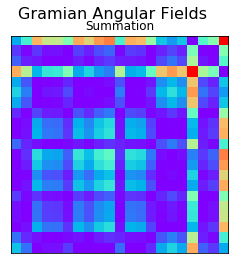

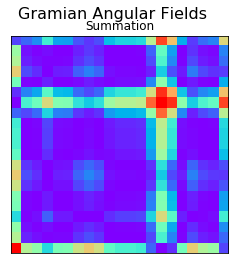

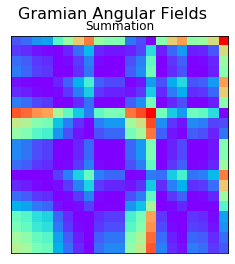

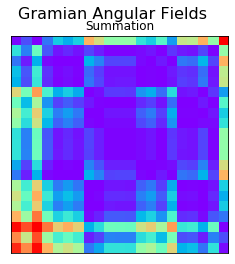

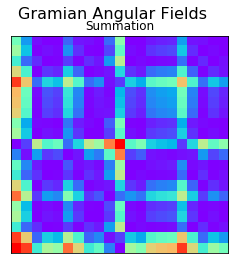

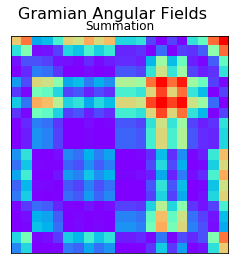

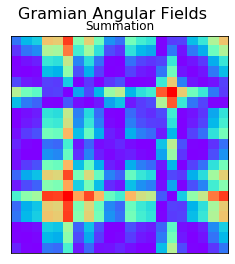

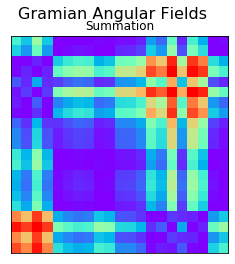

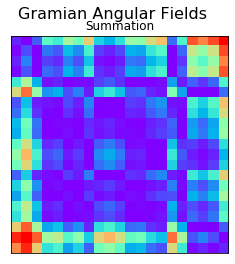

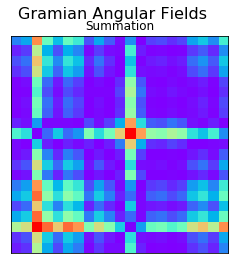

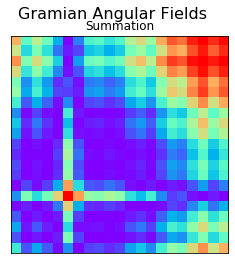

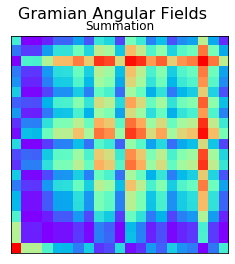

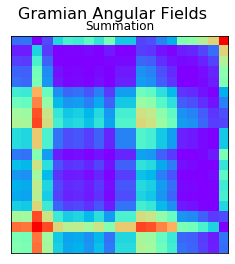

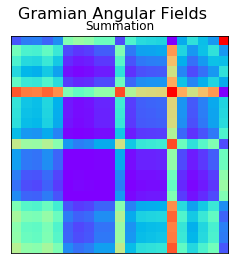

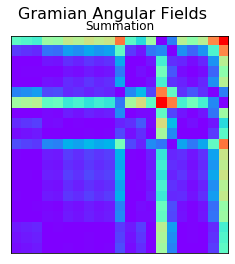

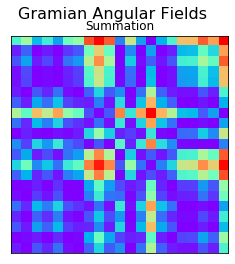

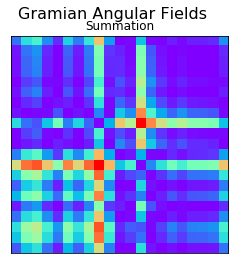

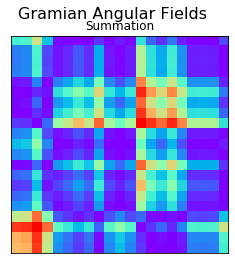

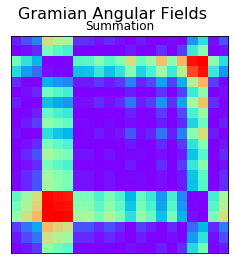

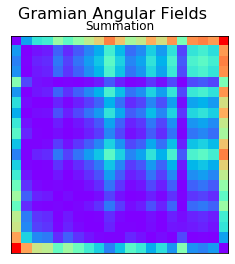

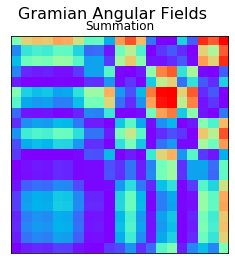

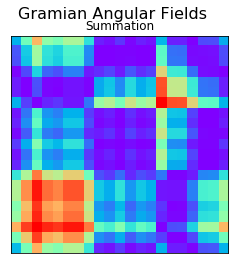

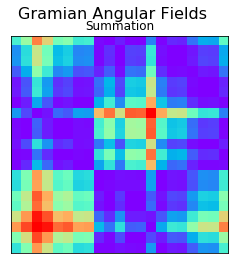

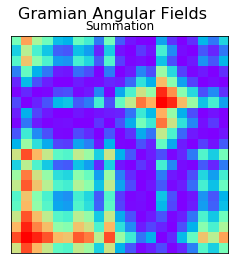

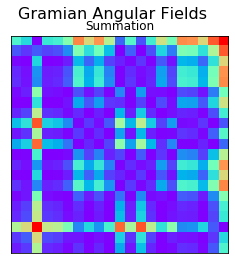

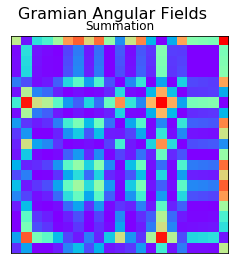

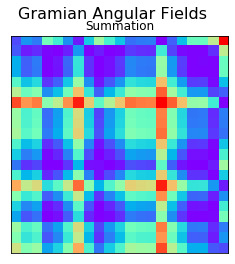

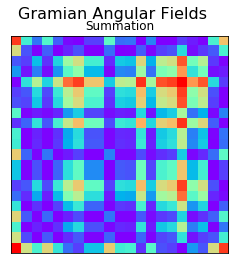

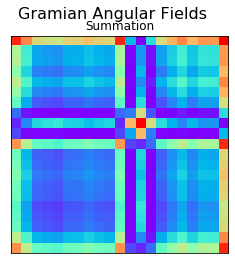

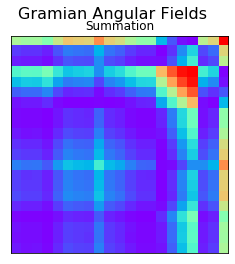

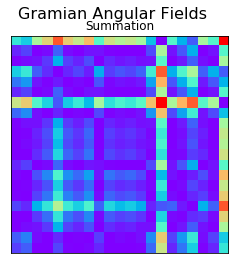

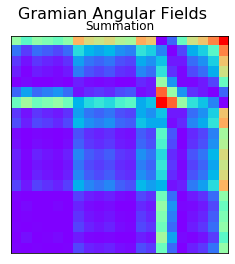

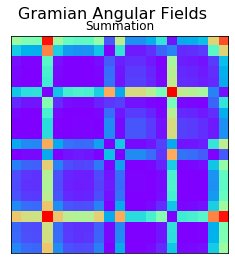

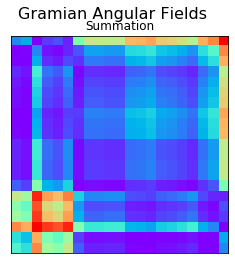

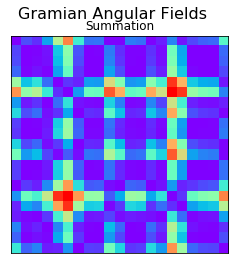

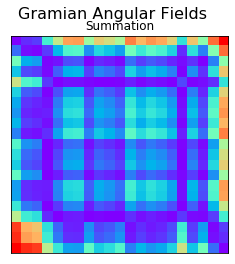

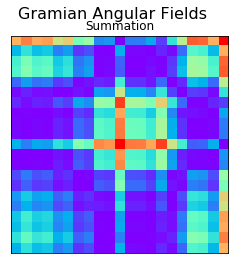

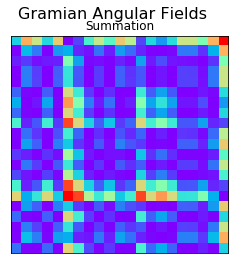

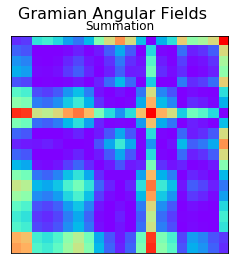

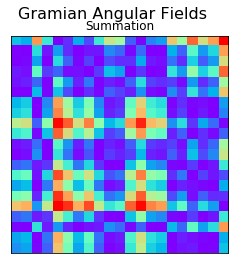

In [41]:
GAF('GAFW.csv')

In [273]:
for column in X:
    X = column
    X

### Plot with Formatting

In [32]:
X.shape

(1, 10)

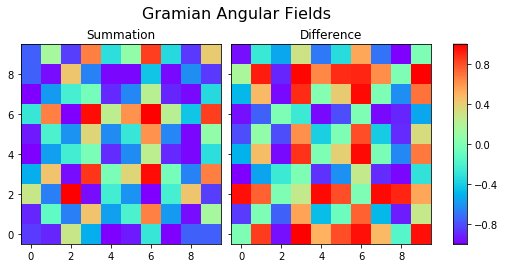

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

# Parameters
# X, _, _, _ = load_gunpoint(return_X_y=True)

# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=10, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=10, method='difference')
X_gadf = gadf.fit_transform(X)

# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()

### Pictures with no formatting

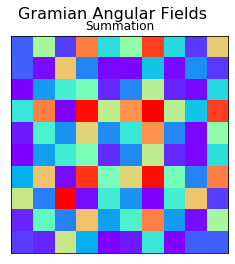

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

# Parameters
# X, _, _, _ = load_gunpoint(return_X_y=True)

# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=10, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=10, method='difference')
X_gadf = gadf.fit_transform(X)


# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 1),
                 axes_pad=0.15,
                 share_all=True,
#                  cbar_location="right",
                 cbar_mode="none",
#                  cbar_size="7%",
#                  cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_yticks([])
ax.set_xticks([])

plt.show()

In [332]:
plt.show()

In [331]:
plt.savefig("%s.png" %1)

<Figure size 432x288 with 0 Axes>

In [10]:
X_gasf

array([[[-0.9804032 , -0.68551999, -0.96698181, -0.82738612,
         -0.81849876, -0.82894675,  0.09898686, -0.8240168 ,
         -0.7800056 , -0.7636398 , -0.93264119, -0.99574938,
         -0.98082756, -0.97983048, -0.45798034, -0.15702107,
         -0.74645863, -0.09898686, -0.95718977, -0.84512966,
         -0.81460254, -0.90980792, -0.92525691, -0.37179573],
        [-0.68551999, -0.13769859, -0.64109817, -0.34970607,
         -0.9999866 , -0.35231335,  0.65662067, -0.34410409,
         -0.27394694, -0.2491009 , -0.55176994, -0.86535135,
         -0.68709518, -0.68341563,  0.14098695,  0.44350595,
         -0.99385778, -0.65662067, -0.61307919, -0.37984385,
         -0.32864018, -0.98215409, -0.53502058,  0.23404632],
        [-0.96698181, -0.64109817, -0.95015079, -0.79259196,
         -0.85115534, -0.79428672,  0.15787529, -0.78893586,
         -0.74148805, -0.72397173, -0.90958152, -0.99946063,
         -0.96753148, -0.96624218, -0.40440904, -0.09812607,
         -0.78463894, 

In [21]:
# x.dtype

In [12]:
# load_gunpoint(return_X_y=True)

In [135]:
X_gasf.shape

(1, 10, 10)